# **Exploratory Data Analysis**

In [ ]:
#importing essential libraires'

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

##True dataset
True["label"]=0

##### on_bad_lines='skip' tells pandas to skip any lines in the CSV that cause parsing errors.(unable to reaad those code/data)
##### In this case, it will skip lines with unclosed quotes or other problematic characters.

In [ ]:
import pandas as pd
true = pd.read_csv("/content/True.csv", encoding='latin-1', on_bad_lines='skip',engine='python')#latin-1 means it will also read europe special characters too.
true.head()


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [ ]:
true.shape

(21416, 4)

###Adding label

In [ ]:
#adding label to true dataset
true["label"]=0

In [ ]:
true.sample(2)

title  \
2207   Chicago teachers union eyes future security wi...   
17229  Factbox: Raqqa - Islamic State's Syrian HQ has...   

                                                    text       subject  \
2207   CHICAGO (Reuters) - After trying for years to ...  politicsNews   
17229  BEIRUT (Reuters) - U.S.-backed militias in Syr...     worldnews   

                    date  label  
2207    August 12, 2017       0  
17229  October 17, 2017       0

###Data cleaning

In [ ]:
true.isna().sum()*100/len(true)

title      0.0
text       0.0
subject    0.0
date       0.0
label      0.0
dtype: float64

In [ ]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
 4   label    21416 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [ ]:
true["subject"].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [ ]:
true["text"].unique()

array(['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a \x1cfiscal conservative\x1d on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS\x19 \x1cFace the Nation,\x1d drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense \x1cdiscretionary\x1d spending on 

In [ ]:
true["subject"].nunique()

2

In [ ]:
# Finding uniques in all columns
import pandas as pd

for i in true.columns:
    print(f"{i}:/n",true[i].unique())

title:/n ['As U.S. budget fight looms, Republicans flip their fiscal script'
 'U.S. military to accept transgender recruits on Monday: Pentagon'
 "Senior U.S. Republican senator: 'Let Mr. Mueller do his job'" ...
 'Minsk cultural hub becomes haven from authorities'
 'Vatican upbeat on possibility of Pope Francis visiting Russia'
 'Indonesia to buy $1.14 billion worth of Russian jets']
text:/n ['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a \x1cfiscal conservative\x1d on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS\x19 \x1cFace the Nation,\x1d drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget 

In [ ]:
# Removing duplicates
true.duplicated().sum()

206

In [ ]:
true.drop_duplicates(inplace=True)

In [ ]:
true.shape

(21210, 5)

<Axes: xlabel='subject', ylabel='count'>

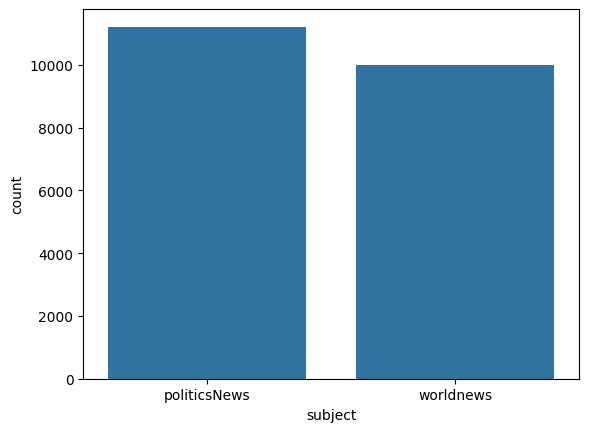

In [ ]:
import seaborn as sns
sns.countplot(data=true,x="subject")

so,here the main topics/subject is about politics and world news

#Fake data

In [ ]:
fake=pd.read_csv("/content/Fake.csv",encoding="latin-1",on_bad_lines="skip",engine="python")

fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [ ]:
fake.shape

(23481, 4)

###Adding label

In [ ]:
#adding labels=1 #1 for fake news
fake["label"]=1

###Data cleaning

In [ ]:
fake.isna().sum()*100/len(fake)

title      0.0
text       0.0
subject    0.0
date       0.0
label      0.0
dtype: float64

In [ ]:
# Droping those null/empty records in fake dataset
fake.dropna(inplace=True)

In [ ]:
fake.isna().sum()*100/len(true)

title      0.0
text       0.0
subject    0.0
date       0.0
label      0.0
dtype: float64

In [ ]:
# Finding uniques in all columns
for i in fake.columns:
    print(f"{i}:\n",fake[i].unique())

title:
 [' Donald Trump Sends Out Embarrassing New Year\x19s Eve Message; This is Disturbing'
 ' Drunk Bragging Trump Staffer Started Russian Collusion Investigation'
 ' Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People \x18In The Eye\x19'
 ...
 'BOILER ROOM \x13 No Surrender, No Retreat, Heads Will Roll  \x13 EP #38'
 'Federal Showdown Looms in Oregon After BLM Abuse of Local Ranching Family \x13 Bundys Lead Protest'
 'A Troubled King: Chicago\x19s Rahm Emanuel Desperate to Save His 2020 Presidential Run']
text:
 ['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  

In [ ]:
fake["subject"].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [ ]:
fake.drop_duplicates(inplace=True)

In [ ]:
fake["subject"].nunique()

6

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'News'),
  Text(1, 0, 'politics'),
  Text(2, 0, 'Government News'),
  Text(3, 0, 'left-news'),
  Text(4, 0, 'US_News'),
  Text(5, 0, 'Middle-east')])

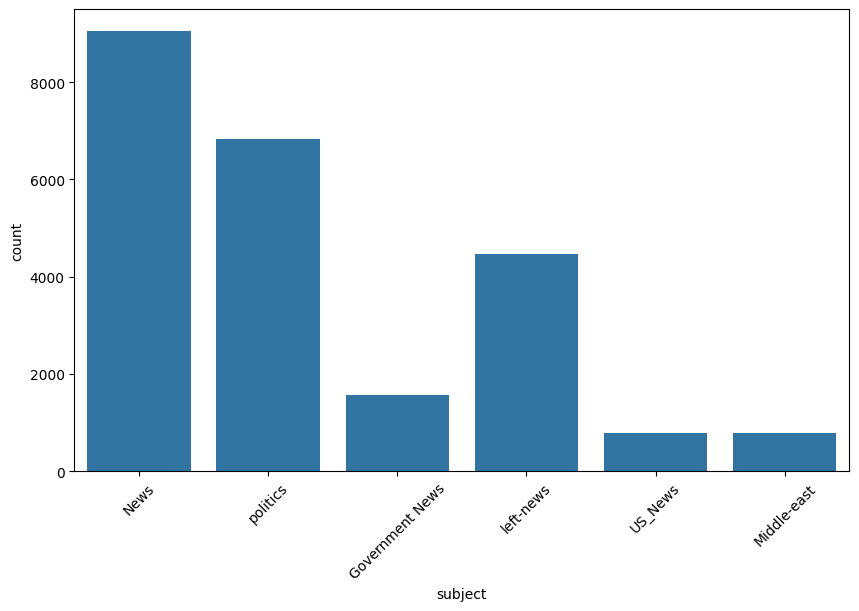

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
sns.countplot(data=fake,x="subject")
plt.xticks(rotation=45)

In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

so,here the subject about news ,politics,government news,left-news,us_news and middle-east

In [ ]:
print(fake.shape)

(23478, 5)


###**Concatinating both True and Fake datasets**

In [ ]:
true=pd.DataFrame(true)
fake=pd.DataFrame(fake)

In [ ]:
df=pd.concat([true,fake],axis=0).reset_index(drop=True)

In [ ]:
df.shape

(44688, 5)

###Data cleaning

In [ ]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
len(df)

44688

In [ ]:
df.tail()

title  \
44683  McPain: John McCain Furious That Iran Treated ...   
44684  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44685  Sunnistan: US and Allied Safe Zone Plan to T...   
44686  How to Blow $700 Million: Al Jazeera America F...   
44687  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
44683  21st Century Wire says As 21WIRE reported earl...  Middle-east   
44684  21st Century Wire says It s a familiar theme. ...  Middle-east   
44685  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
44686  21st Century Wire says Al Jazeera America will...  Middle-east   
44687  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  label  
44683  January 16, 2016      1  
44684  January 16, 2016      1  
44685  January 15, 2016      1  
44686  January 14, 2016      1  
44687  January 12, 2016      1

In [ ]:
df["subject"].value_counts()

subject
politicsNews       11219
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

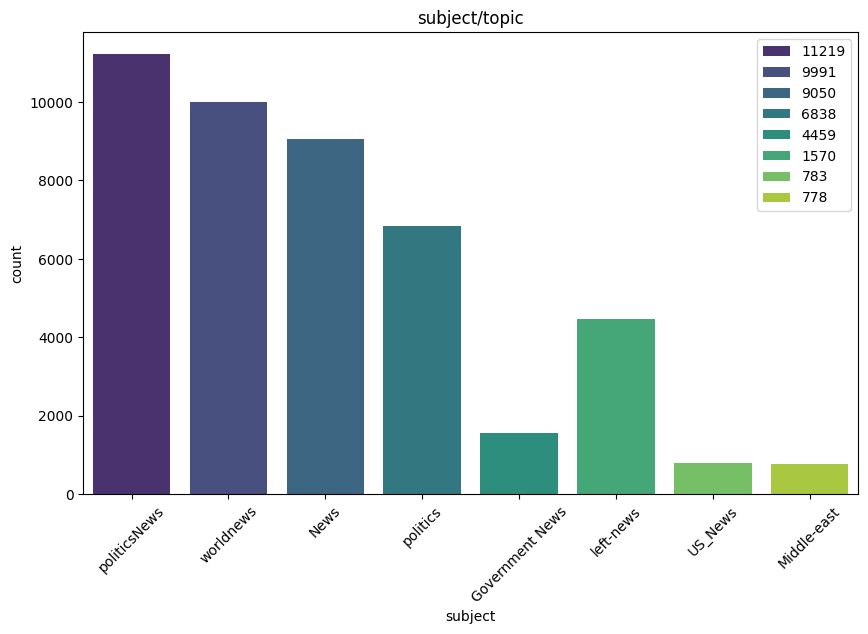

In [ ]:
# Count of Subjects in the Dataset
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="subject",palette='viridis')
plt.legend(df["subject"].value_counts())
plt.xticks(rotation=45)
plt.title("subject/topic")
plt.xlabel("subject")
plt.ylabel("count")
plt.show()

<Axes: xlabel='subject'>

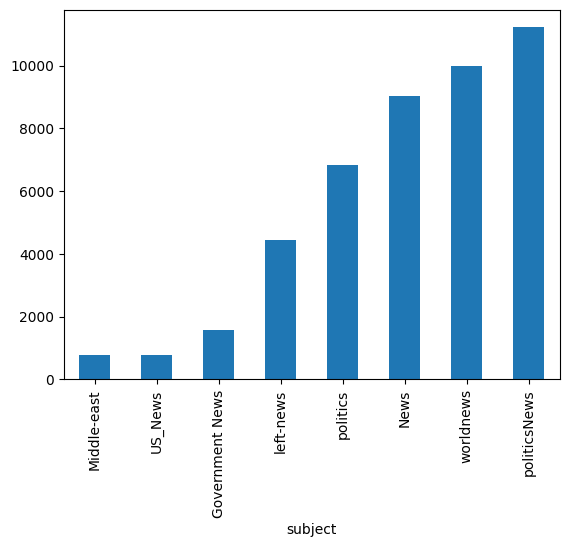

In [ ]:
# Count of Subjects in the Dataset (Ascending Order)
from pickle import TRUE
df["subject"].value_counts().sort_values(ascending=True).plot(kind="bar")

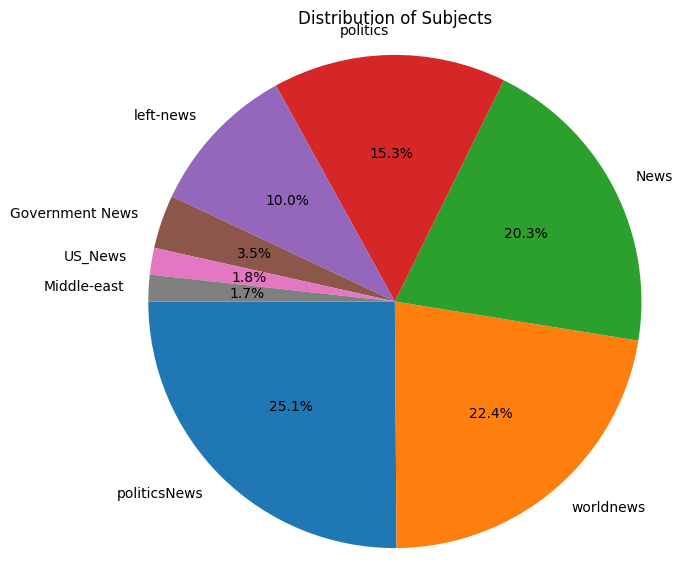

In [ ]:
# Pie chart
# Distribution of Subjects in the Dataset
sub_counts=df["subject"].value_counts()
plt.figure(figsize=(7,7))
plt.pie(sub_counts,labels=sub_counts.index,autopct="%1.1f%%",startangle=180)
plt.title('Distribution of Subjects')
plt.axis('equal')
plt.show()

In [ ]:
df["label"].value_counts() #0 =True
                            #1=fake

label
1    23478
0    21210
Name: count, dtype: int64

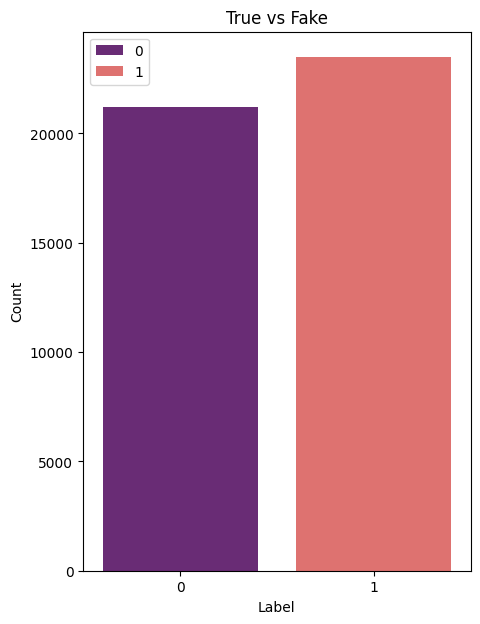

In [ ]:
# Distribution of True and Fake Labels
plt.figure(figsize=(5, 7))
sns.countplot(x="label", data=df, palette="magma")
plt.title("True vs Fake")
plt.xticks(rotation=0)
plt.xlabel("Label")
plt.ylabel("Count")
legend=df["label"].value_counts().sort_values(ascending=True)
plt.legend(legend.index)
plt.show()


In [ ]:
df.tail()

title  \
44683  McPain: John McCain Furious That Iran Treated ...   
44684  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44685  Sunnistan: US and Allied Safe Zone Plan to T...   
44686  How to Blow $700 Million: Al Jazeera America F...   
44687  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
44683  21st Century Wire says As 21WIRE reported earl...  Middle-east   
44684  21st Century Wire says It s a familiar theme. ...  Middle-east   
44685  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
44686  21st Century Wire says Al Jazeera America will...  Middle-east   
44687  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  label  
44683  January 16, 2016      1  
44684  January 16, 2016      1  
44685  January 15, 2016      1  
44686  January 14, 2016      1  
44687  January 12, 2016      1

In [ ]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

#Adding required columns subject,title and text data into a single column

In [ ]:
df['Text'] = df['text']

In [ ]:
df["Text"][1991]

'WASHINGTON (Reuters) - White House adviser Sebastian Gorka, who was closely aligned with a nationalist faction led by ousted senior strategist Steve Bannon, no longer works for President Donald Trump, the White House said on Friday. \x1cSebastian Gorka did not resign, but I can confirm he no longer works at the White House,\x1d a White House official said in a statement. The official did not elaborate, but the statement suggested that Gorka had been fired. Gorka had reportedly feuded with national security adviser General H.R. McMaster and was unhappy with the decision Trump announced this week - backed by McMaster and the U.S. military - to reorient U.S. policy in Afghanistan. Gorka, who frequently appeared on cable news shows to tout Trump\x19s policies, was a divisive figure within the  administration, seen by veteran intelligence professionals and diplomats as an ideologue with little real-world experience. He is the latest in a string of hawkish or nationalist advisers to leave t

In [ ]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  \
0  December 31, 2017       0   
1  December 29, 2017       0   
2  December 31, 2017       0   
3  December 30, 2017       0   
4  December 29, 2017       0   

                                                Text  
0  WASHINGTON (Reuters) - The head of a conservat...  
1  WASHINGTON (Reuters) - Transgender people will...  
2  WASHINGTON (Reuters) - The special counsel inv...  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...

In [ ]:
df.shape

(44688, 6)

In [ ]:
data=df.copy()

In [ ]:
data.drop(columns=["title","subject","date"],inplace=True,axis=1)

In [ ]:
data.head()

text  label  \
0  WASHINGTON (Reuters) - The head of a conservat...      0   
1  WASHINGTON (Reuters) - Transgender people will...      0   
2  WASHINGTON (Reuters) - The special counsel inv...      0   
3  WASHINGTON (Reuters) - Trump campaign adviser ...      0   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      0   

                                                Text  
0  WASHINGTON (Reuters) - The head of a conservat...  
1  WASHINGTON (Reuters) - Transgender people will...  
2  WASHINGTON (Reuters) - The special counsel inv...  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...

## Advanced method to check whether there is any empty  strings in dataframe

like finding empty spaces without having any string/categorical data in the records.if there any its shows indexs of that then we simply drop those

In [ ]:
blanks=[]
for index,Text in data["Text"].items():
    if Text.isspace():
        blanks.append(index)
len(blanks)

631

In [ ]:
data.drop(blanks, inplace=True)

In [ ]:
blanks=[]
for index,Text in data["Text"].items():
    if Text.isspace():
        blanks.append(index)
len(blanks)

0

 0 zero blank spaces found that means all records filled with some strings

In [ ]:
data.head()

text  label  \
0  WASHINGTON (Reuters) - The head of a conservat...      0   
1  WASHINGTON (Reuters) - Transgender people will...      0   
2  WASHINGTON (Reuters) - The special counsel inv...      0   
3  WASHINGTON (Reuters) - Trump campaign adviser ...      0   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      0   

                                                Text  
0  WASHINGTON (Reuters) - The head of a conservat...  
1  WASHINGTON (Reuters) - Transgender people will...  
2  WASHINGTON (Reuters) - The special counsel inv...  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...

In [ ]:
df=data.copy()

In [ ]:
df.head()

text  label  \
0  WASHINGTON (Reuters) - The head of a conservat...      0   
1  WASHINGTON (Reuters) - Transgender people will...      0   
2  WASHINGTON (Reuters) - The special counsel inv...      0   
3  WASHINGTON (Reuters) - Trump campaign adviser ...      0   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      0   

                                                Text  
0  WASHINGTON (Reuters) - The head of a conservat...  
1  WASHINGTON (Reuters) - Transgender people will...  
2  WASHINGTON (Reuters) - The special counsel inv...  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...

In [ ]:
# Importing essential libraries
import spacy.cli
spacy.cli.download("en_core_web_sm")#english small module
import spacy
nlp=spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Downloading required packages and applying tokenization,removing stopwords, applying lemmatization etc.**

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #(porter ,#snowball stemmer are also optional in stemming)
import re #regular expression
import nltk #natural language tool kit
import spacy

**Lowercasing**

Converting all text to lowercase to ensures that words like "Fake" and "fake" are treated the same by the model.
Keep this as a foundational step, as case distinctions rarely add value in this classification task.

**Remove Special Characters and Punctuation**

Removing punctuation and special characters like #, @, *, etc.
Punctuation and special characters rarely contribute meaningfully to text classification.


**Tokenization**

Tokenization is the process of breaking down text into smaller units called tokens. These tokens can be words, phrases, or even individual characters, depending on the task. It's a fundamental step in natural language processing (NLP), used for text analysis and model training.

**Stopwords**

Stop words are common words (like "the", "a", "is", "in") that are often removed from text during preprocessing because they're considered to carry little meaningful information for analysis.

**Stemming/Lemmatization**

Stemming/Lemmatization are techniques used to reduce words to their base or root form, improving text analysis and model performance.

#####Stemming is a simpler, rule-based process that chops off word endings (e.g., "running" becomes "run").
#####Lemmatization is more complex and considers the word's context to produce a dictionary-form word (lemma) (e.g., "better" becomes "good").

In [ ]:
nltk.download('punkt') #pre trained tokenizer model available in nltk
nltk.download('stopwords')
nltk.download('wordnet') #wordnet lemmatizer from nltk
#spacy stopwords
spacy=nlp.Defaults.stop_words
print(len(spacy))
#nltk stopwords
nltk_stopwords=stopwords.words("english") # Changed variable name to nltk_stopwords to avoid conflict
print(len(nltk_stopwords))
stopwords_combined = set((set(spacy) | set(nltk_stopwords)))  #union  of both stopwords for better reduction of stopwords in data # Changed variable name to stopwords_combined to avoid conflict
print(len(stopwords_combined))


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords_combined]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

def process_Text_column(df):
    df['processed_Text'] = df['Text'].apply(preprocess_text)
    return df

# Example usage
df = process_Text_column(df)

print(df['processed_Text'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


326
179
382
0    washington reuters head conservative republica...
1    washington reuters transgender people allowed ...
2    washington reuters special counsel investigati...
3    washington reuters trump campaign adviser geor...
4    seattlewashington reuters president donald tru...
Name: processed_Text, dtype: object


Normal record from df

In [ ]:
df["Text"][1919]


'HOUSTON (Reuters) - Union Pacific Corp said on Saturday repairs to a rail line damaged by Tropical Stormy Harvey are being hindered by a fire at an Arkema chemical plant in Crosby, Texas. The railroad said the repairs to its line between Houston and Beaumont, Texas, are one of its top priorities. However, the line runs next to the smoldering chemical plant, limiting access for its repair crews.    '

After applying of tokenization,removing stopwords and lemmatization

In [ ]:
preprocess_text(df["Text"][1919])

'houston reuters union pacific corp said saturday repair rail line damaged tropical stormy harvey hindered fire arkema chemical plant crosby texas railroad said repair line houston beaumont texas priority line run smoldering chemical plant limiting access repair crew'

In [ ]:
df.head()

text  label  \
0  WASHINGTON (Reuters) - The head of a conservat...      0   
1  WASHINGTON (Reuters) - Transgender people will...      0   
2  WASHINGTON (Reuters) - The special counsel inv...      0   
3  WASHINGTON (Reuters) - Trump campaign adviser ...      0   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      0   

                                                Text  \
0  WASHINGTON (Reuters) - The head of a conservat...   
1  WASHINGTON (Reuters) - Transgender people will...   
2  WASHINGTON (Reuters) - The special counsel inv...   
3  WASHINGTON (Reuters) - Trump campaign adviser ...   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...   

                                      processed_Text  
0  washington reuters head conservative republica...  
1  washington reuters transgender people allowed ...  
2  washington reuters special counsel investigati...  
3  washington reuters trump campaign adviser geor...  
4  seattlewashington reuters president donald tru...

Named Entity Recognization from spacy Frame work

In [ ]:
doc=nlp(df["processed_Text"][1919])
def named_entities(doc):
    if doc.ents:
        for token in doc.ents:
            print(token.text,"------>",token.label_)
    else:
        print("No named entities found")
named_entities(doc)

houston reuters union pacific corp ------> ORG
saturday ------> DATE
texas ------> GPE
houston ------> GPE
beaumont ------> GPE
texas ------> GPE


In [ ]:
from spacy import displacy

In [ ]:
displacy.render(doc,style="ent",jupyter=True)

In [ ]:
import spacy

# Load the spaCy model (you may need to download it first)
nlp = spacy.load("en_core_web_sm")

# Now you can use the explain function
spacy.explain("GPE")

'Countries, cities, states'

In [ ]:
# Selecting particular entities like:"ORG","GPE".
colors = {"ORG": "linear-gradient(to right, red, yellow)", "GPE": "radial-gradient(red, yellow)"}
options = {"ents": ["ORG", "GPE"], "colors": colors}
displacy.render(doc, style="ent", jupyter=True, options=options)

In [ ]:
# Selecting required columns and remaining ignore
df=df[["processed_Text","label"]]
df.head()

processed_Text  label
0  washington reuters head conservative republica...      0
1  washington reuters transgender people allowed ...      0
2  washington reuters special counsel investigati...      0
3  washington reuters trump campaign adviser geor...      0
4  seattlewashington reuters president donald tru...      0

In [ ]:
import pandas as pd
from collections import Counter
import plotly.express as px

def get_top_n_words(text, n=50):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

# Group by label and concatenate the text
label_texts = df.groupby('label')['processed_Text'].apply(lambda x: ' '.join(x)).to_dict()

# Calculate top 50 word counts for each label
top_words_by_label = {}
for label, text in label_texts.items():
    top_words_by_label[label] = get_top_n_words(text)

# Prepare data for Plotly
data = []
for label, word_counts in top_words_by_label.items():
    for word, count in word_counts:
        data.append({'label': label, 'word': word, 'count': count})

df_plotly = pd.DataFrame(data)

# Add hover data for total counts by grouping by 'word'
df_plotly['total_count'] = df_plotly.groupby('word')['count'].transform('sum')

# Create a bar chart with Plotly
fig = px.bar(df_plotly, x='word', y='count', color='label', barmode='group',
             title='Top 50 Word Counts by Label', hover_data=['total_count'])
fig.show()


#WORD CLOUD

A word cloud visualization is a graphic that shows how often words appear in a text

In [ ]:
from wordcloud import WordCloud

True==0 label and those words comming based on frequencies

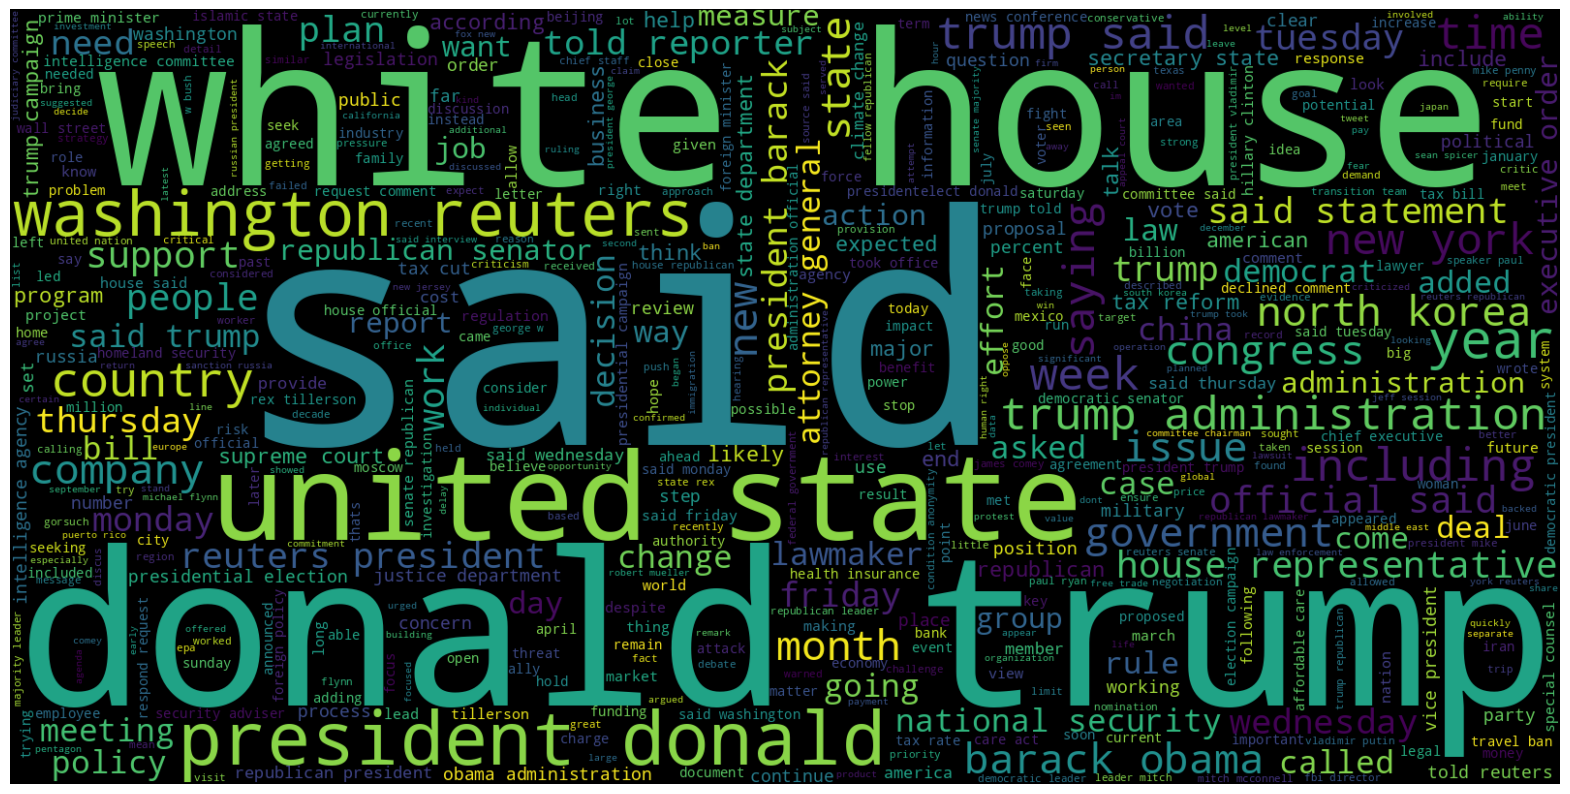

In [ ]:
# Word Cloud Visualization of the True Dataset
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.label == 0].processed_Text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

Fake==1 label and those words comming based on frequencies

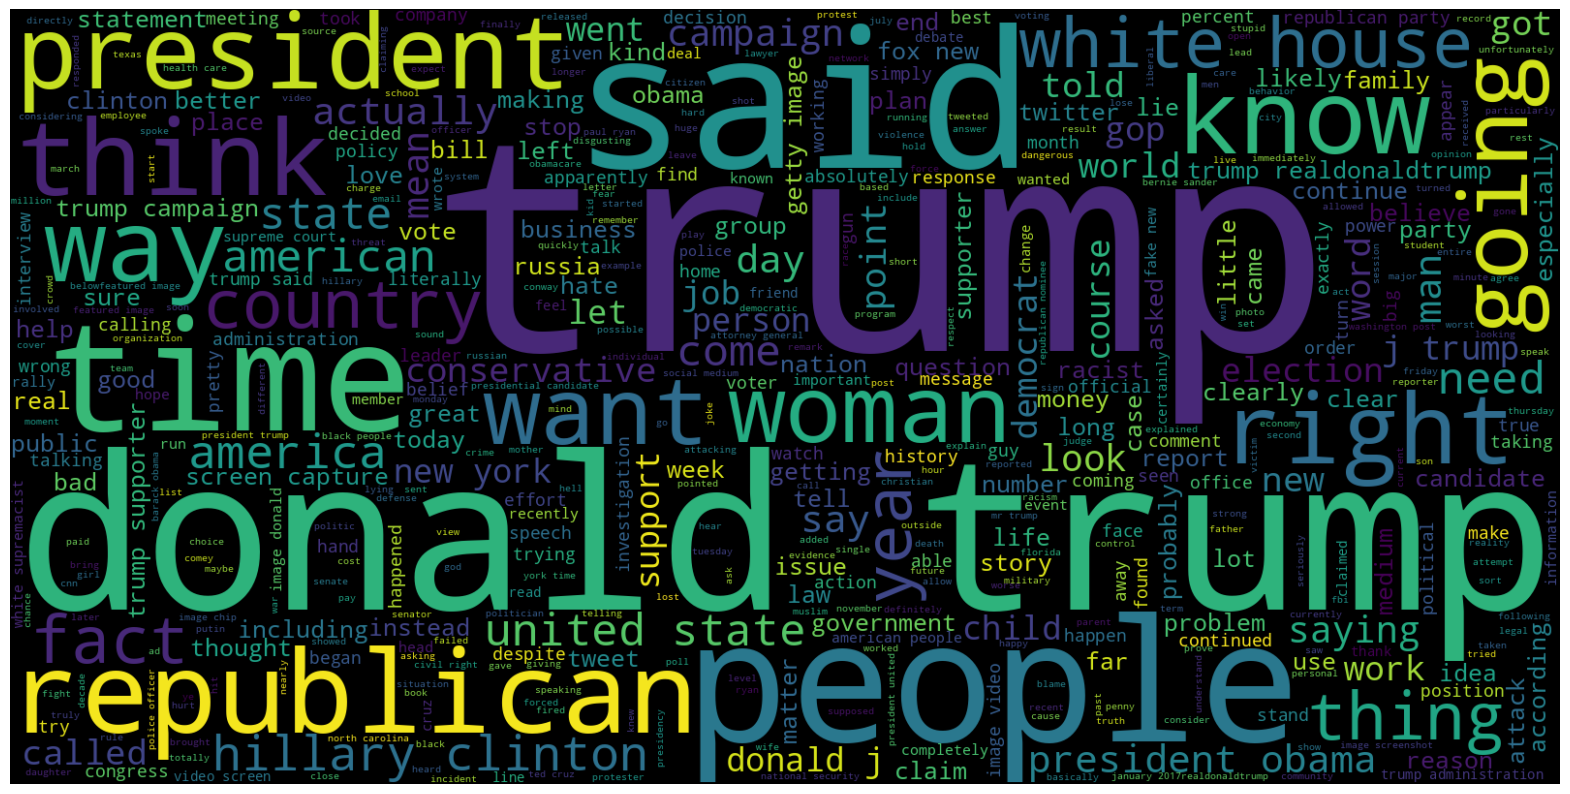

In [ ]:
import matplotlib.pyplot as plt
# Fake==1 label and those words comming based on frequencies
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.label == 1].processed_Text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')


**THUMBSUP FOR TRUE DATA**

thumbsup for true news and importing thumbs up image from local data

**Importing pillow for image uploading/processing**

In [ ]:
from PIL import Image

In [ ]:
#importing thumbs up image:
thumb="/content/thumbs-up.png"
#opening image
icon=Image.open(thumb)
#just taking reference of thumb image size  and shape replacing with fine white(255)#RGB
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

##Top 500 Words in the True Data Shaped as a Thumbs Up

#####RGB colors are represented as a combination of Red, Green, and Blue values, typically ranging from 0 to 255.

For example:

**rgb(255, 0, 0) represents Red,
rgb(0, 255, 0) represents Green,
rgb(0, 0, 255) represents Blue,
rgb(255, 255, 255) represents White,
rgb(0, 0, 0) represents Black.**

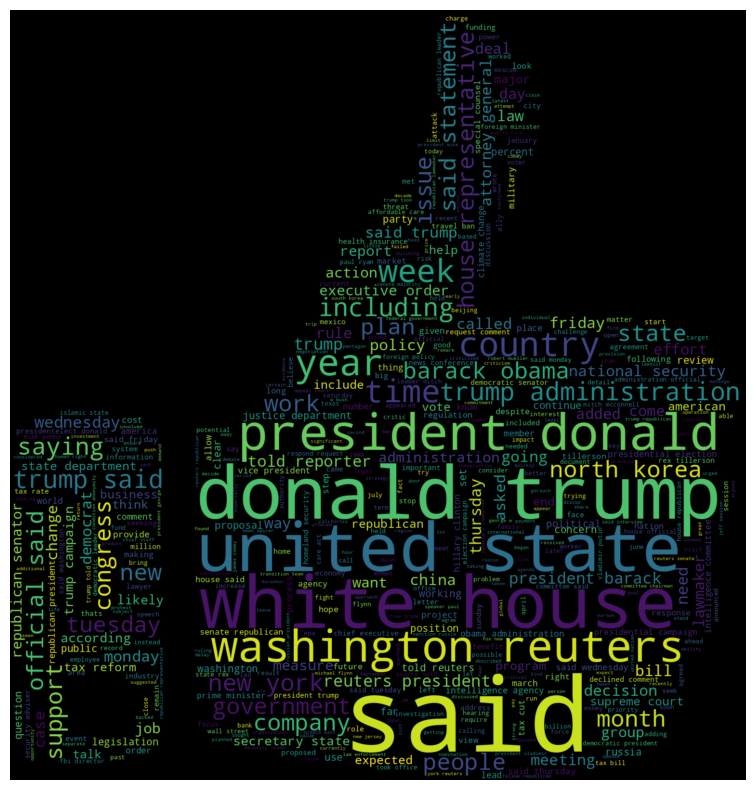

In [ ]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 500 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.label == 0].processed_Text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

**SKULL FOR FAKE DATA**

## Top 500 Words in the Fake Data Shaped as a Skull

In [ ]:
#importing thumbs up image:
skull="/content/skull-icon.png"
#opening image
icon=Image.open(skull)
#just taking reference of thub image size  and shape replacing with fine white(255)#RGB
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

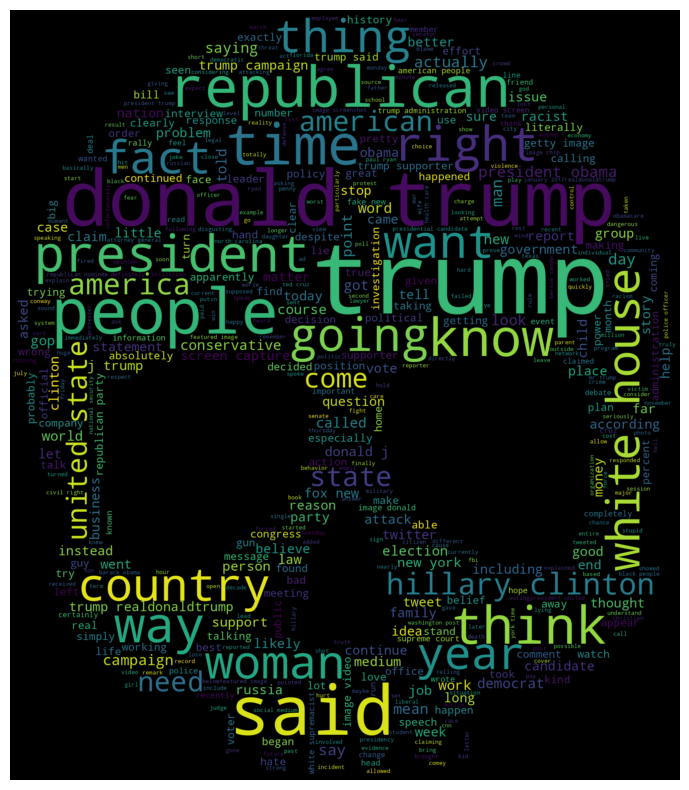

In [ ]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 500 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.label == 1].processed_Text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

#Creating Bag of Words Using TF-IDF(term frequency and inverse document frequency)

**TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used in Natural Language Processing to determine the importance of a word to a document in a collection of documents. It works by weighing the frequency of a word in a document (TF) against how often it appears in the entire collection (IDF).**

**In simpler terms: TF-IDF helps identify words that are important and unique to a specific document, while downplaying common words that appear everywhere. This makes it useful for tasks like text summarization, information retrieval, and text classification.**

**Example: If a document frequently mentions "data," but "data" appears in many other documents too, TF-IDF will give it a moderate score. However, if the document also contains a less frequent but relevant word like "algorithm," it will receive a higher TF-IDF score, highlighting its significance within that document.**

In [ ]:
df.head()

Model  Accuracy  Precision  Recall  F1_score
0       Logistic_Regression      98.4       0.98    0.98      0.98
1  Decision_Tree_Classifier      99.4       0.99    0.99      0.99
2             Random_Forest      98.7       0.98    0.98      0.98
3   Multinomial Naive_Bayes      94.3       0.95    0.93      0.94

In [ ]:
x=df["processed_Text"]
y=df["label"]

In [ ]:
x.shape

(44057,)

In [ ]:
y.value_counts()

label
1    22848
0    21209
Name: count, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame with the text data in the 'processed_Text' column
x = df["processed_Text"]  # Get the original text data
y = df["label"]

tfidf = TfidfVectorizer()

# Transform the original text data 'x' into a TF-IDF matrix
x = tfidf.fit_transform(x) # Assign the result to a new variable 'x_tfidf'

# Now you can use 'x_tfidf' for further processing
print(x.shape)

(44057, 218451)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train:",x_train.shape)
print("x_train:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (35245, 218451)
x_train: (8812, 218451)
y_train: (35245,)
y_test: (8812,)


#Model Building
1.Logistic Regression.

2.Decision Tree Classifier (CART).

3.Random FOrest Classifier(ensemble).

4.Multinominal Naive Bayes.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # Changed 'X' to 'x'

# models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"Model: {model_name}")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test))
    # Removed pos_label, using the default (which assumes positive label is 1)
    #for only positive scores
    print("Precision:", precision_score(y_test, y_pred_test))
    print("Recall:", recall_score(y_test, y_pred_test))
    print("F1 Score:", f1_score(y_test, y_pred_test))
    print("-" * 50)

Model: Logistic Regression
Training Accuracy: 0.992339338913321
Testing Accuracy: 0.9838856105310939
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4248
           1       0.99      0.98      0.98      4564

    accuracy                           0.98      8812
   macro avg       0.98      0.98      0.98      8812
weighted avg       0.98      0.98      0.98      8812

Precision: 0.9855072463768116
Recall: 0.9833479404031551
F1 Score: 0.9844264093002851
--------------------------------------------------
Model: Decision Tree
Training Accuracy: 1.0
Testing Accuracy: 0.9944394008170676
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4248
           1       0.99      1.00      0.99      4564

    accuracy                           0.99      8812
   macro avg       0.99      0.99      0.99      8812
weighted avg       0.99      0.99 

# Description of Precision,Recall,and F1 score
### Precision:

Description: Precision is the proportion of correctly predicted positive instances out of all the instances predicted as positive. It measures how accurate the model is when it predicts a positive outcome.
**Precision(pos) = TP / (TP + FP)**

### Recall:

Description: Recall (also called Sensitivity or True Positive Rate) is the proportion of correctly predicted positive instances out of all actual positive instances. It measures how well the model captures all the positive instances in the dataset.

**Recall(pos) = TP / (TP + FN)**

### F1-score:

Description: The F1-score is the harmonic mean of Precision and Recall. It provides a single metric that balances the concerns of both Precision and Recall. It is particularly useful when you want to find a balance between minimizing false positives and false negatives.

**F1-score(pos) = 2 * (Precision(pos) * Recall(pos)) / (Precision(pos) + Recall(pos))**


#Here we are  choose Decision Tree Classifier

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report, accuracy_score
# from scipy.stats import randint


# y = df['label']
# #splitting dataset
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Setting up hyperparameters to tune
# param_dist = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None] + list(randint(10, 30).rvs(5)),  # Random depths between 10 and 30
#     'min_samples_split': randint(2, 10),  # Random values between 2 and 9 for min samples split
#     'min_samples_leaf': randint(1, 5)  # Random values between 1 and 4 for min samples leaf
# }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1, random_state=42, verbose=1)

# # Fit the model
# random_search.fit(X_train, y_train)

# # Best parameters and performance
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)

# # Evaluate with test data
# best_model = random_search.best_estimator_
# y_pred_test = best_model.predict(X_test)

# print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
# print("Classification Report:\n", classification_report(y_test, y_pred_test))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 8}
Best Score: 0.9977753277600309
Testing Accuracy: 0.9976043805612594
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1384
           1       1.00      1.00      1.00      1538

    accuracy                           1.00      2922
   macro avg       1.00      1.00      1.00      2922
weighted avg       1.00      1.00      1.00      2922



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Parameters from your best model
params = {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 8}

# Define the model
decision_tree = DecisionTreeClassifier(**params)

# Fit the model on your training data
decision_tree.fit(x_train, y_train)

# Make predictions on the training data
train_predictions = decision_tree.predict(x_train)

# Make predictions on the testing data
test_predictions = decision_tree.predict(x_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print("Classification Report:\n", classification_report(y_test, test_predictions))


Training Accuracy: 0.9977585473116755
Testing Accuracy: 0.994098955969133
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4248
           1       1.00      0.99      0.99      4564

    accuracy                           0.99      8812
   macro avg       0.99      0.99      0.99      8812
weighted avg       0.99      0.99      0.99      8812



**Confusion matrix for test data of Decision Tree Classifier**

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix:","\n",cm)

confusion_matrix: 
 [[4048  200]
 [ 312 4252]]


**Heat Map**

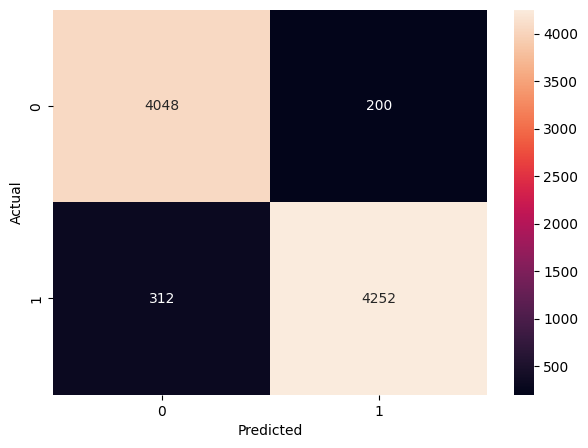

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

####ROC AND AUC curve

####**Setting different thresholds based on our Requirements**

In [ ]:
from sklearn.metrics import roc_curve, auc,RocCurveDisplay

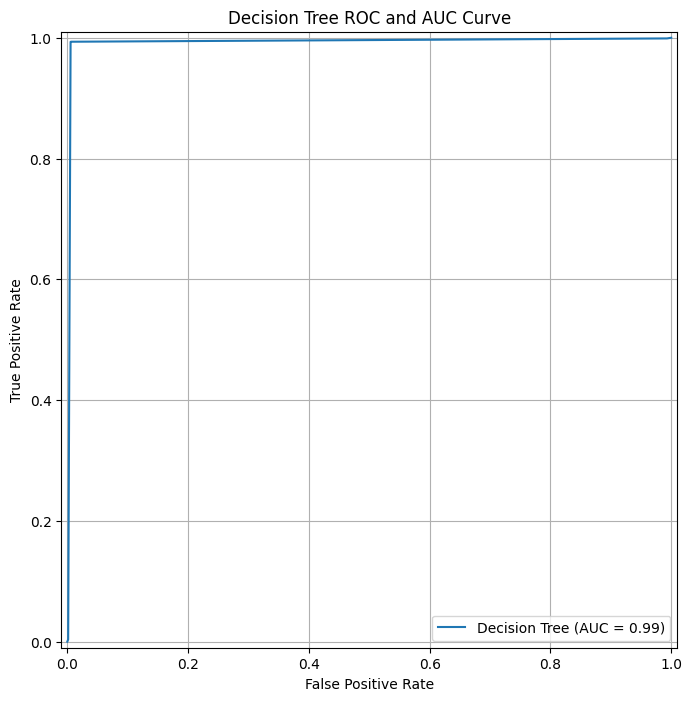

In [ ]:
# Predict probabilities
y_pred_prob = decision_tree.predict_proba(X_test)[:, 1]#best_model.predict(X_test)

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree').plot(ax=plt.gca())
plt.title('Decision Tree ROC and AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()


#Creating DataFrame based on Accuracy of Model

In [ ]:
data={"Model":["Logistic_Regression","Decision_Tree_Classifier","Random_Forest","Multinomial Naive_Bayes"],
      "Accuracy":[98.4,99.4,98.7,94.3],
      "Precision":[0.98,0.99,0.98,0.95],
      "Recall":[0.98,0.99,0.98,0.93],
      "F1_score":[0.98,0.99,0.98,0.94]}

In [ ]:
import pandas as pd
import numpy as np
df=pd.DataFrame(data)
df

Model  Accuracy  Precision  Recall  F1_score
0       Logistic_Regression      98.4       0.98    0.98      0.98
1  Decision_Tree_Classifier      99.4       0.99    0.99      0.99
2             Random_Forest      98.7       0.98    0.98      0.98
3   Multinomial Naive_Bayes      94.3       0.95    0.93      0.94

In [ ]:
# Sorting based on Accuracy
df.sort_values("Accuracy",ascending=False).reset_index(drop=True)

Model  Accuracy  Precision  Recall  F1_score
0  Decision_Tree_Classifier      99.4       0.99    0.99      0.99
1             Random_Forest      98.7       0.98    0.98      0.98
2       Logistic_Regression      98.4       0.98    0.98      0.98
3   Multinomial Naive_Bayes      94.3       0.95    0.93      0.94

#Exporting model by using PICKLE MODULE

In [ ]:
import pickle

In [ ]:
filename = 'NLP_PROJECT_MODEL.pkl'
pickle.dump(decision_tree, open(filename, 'wb')) #write binary

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))# read binary

Actual

In [ ]:
"houston reuters union pacific corp said saturday repair rail line damaged tropical stormy harvey hindered fire arkema chemical plant crosby texas railroad said repair line houston beaumont texas priority line run smoldering chemical plant limiting access repair crew"

#ACTUAL O/p=0

'houston reuters union pacific corp said saturday repair rail line damaged tropical stormy harvey hindered fire arkema chemical plant crosby texas railroad said repair line houston beaumont texas priority line run smoldering chemical plant limiting access repair crew'

prediction

In [ ]:
txt = "houston reuters union pacific corp said saturday repair rail line damaged tropical stormy harvey hindered fire arkema chemical plant crosby texas railroad said repair line houston beaumont texas priority line run smoldering chemical plant limiting access repair crew"
txt = tfidf.transform([txt]) # Pass txt as a list of strings
decision_tree.predict(txt)

array([0])

### Saving TF-IDF Vectorizer using Pickle in Python

In [ ]:
pickle.dump(tfidf,open("tfidf_vectorization.pkl","wb"))

prediction

In [ ]:
#model
loaded_model=pickle.load(open("/content/NLP_PROJECT_MODEL.pkl","rb"))
#vectorizer
loaded_tfidf=pickle.load(open("/content/tfidf_vectorization.pkl","rb"))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
data="houston reuters union pacific corp said saturday repair rail line damaged tropical stormy harvey hindered fire arkema chemical plant crosby texas railroad said repair line houston beaumont texas priority line run smoldering chemical plant limiting access repair crew"
data=loaded_tfidf.transform([data])
pred=loaded_model.predict(data)
pred

array([0])